In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
from pandas import Series
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
import gmplot
#importing the dataset using pandas
df = pd.read_csv("./911.csv")

#sample of original dataset
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [2]:
#separate timeStamp data into 2 new columns
df['date'] = df.timeStamp.str[0:11]
df['time'] = df.timeStamp.str[-8:]

#Get rid of dummy 'e' column and 'timeStamp' column
del df['e']
del df['timeStamp']
#If time at end, then try to extract station number and impute
del df['desc']

#sample of dataset
df.head(10)

,lat,lng,zip,title,twp,addr,date,time
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,2015-12-10,17:10:52
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,2015-12-10,17:29:21
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,2015-12-10,14:39:21
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,2015-12-10,16:47:36
4,40.251492,-75.603350,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,2015-12-10,16:56:52
5,40.253473,-75.283245,19446.0,EMS: HEAD INJURY,LANSDALE,CANNON AVE & W 9TH ST,2015-12-10,15:39:04
6,40.182111,-75.127795,19044.0,EMS: NAUSEA/VOMITING,HORSHAM,LAUREL AVE & OAKDALE AVE,2015-12-10,16:46:48
7,40.217286,-75.405182,19426.0,EMS: RESPIRATORY EMERGENCY,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,2015-12-10,16:17:05
8,40.289027,-75.399590,19438.0,EMS: SYNCOPAL EPISODE,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,2015-12-10,16:51:42
9,40.102398,-75.291458,19462.0,Traffic: VEHICLE ACCIDENT -,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,2015-12-10,17:35:41


In [3]:
#count number of values in each column
df.count()

lat      177755
lng      177755
zip      155957
title    177755
twp      177694
addr     177755
date     177755
time     177755
dtype: int64

In [4]:
#Finds total number of rows with missing values 
#Rows with more than one missing value only counted once
df.isnull().any(axis=1).sum()

21822

In [5]:
#Drop rows with missing zipcode values
df = df.dropna(subset=['zip'])

#Convert float values for zipcodes to integer type
df['zip'] = df['zip'].astype(int)
df.count()

lat      155957
lng      155957
zip      155957
title    155957
twp      155933
addr     155957
date     155957
time     155957
dtype: int64

In [6]:
empty = np.where(pd.isnull(df))
geolocator = Nominatim()
index = 0


#Impute 24 missing township values
for i in np.nditer(empty):
    
    #row of missing township cell
    row = empty[0][index] 
    #column of missing township cell
    column = empty[1][index]
    
    
    temp_lat = repr(df.iloc[row,0])
    temp_long = repr(df.iloc[row,1])
    
    
    location = geolocator.reverse([temp_lat, temp_long], timeout = 60)
    
    if column == 4:
        
    
        #extract township value from location dictionary
        town = location.raw['address']['city'] 
    
    
        #remove 'Township' ending from name of town    
        if town.endswith("Township"):
            town = town[0:-9]
            
        else:
            pass
                
        #convert to uppercase to maintain township format in dataframe    
        town = town.upper()
    
        #put imputed township name into corresponding missing cell of dataframe
        df.iloc[row, column] = town
    
        print(df.iloc[row, column])
        
    else:
        
        pass
        
        #Elected to comment out code to impute missing zipcodes because it would take too long (approx. 4-6 hrs.)
        #zcode = location.raw['address']['postcode']
        
        #df.iloc[row, column] = zcode
        
        #print(df.iloc[row, column])
    
        
    #increment index to get to next set of index values for empty township cell
    index += 1

UPPER MORELAND
WARRINGTON
NORRISTOWN
NORRISTOWN
MONTGOMERY
UPPER MERION
TOWAMENCIN
HATBORO
HORSHAM
HATFIELD
JENKINTOWN
LOWER MERION
FRANCONIA
HATBORO
POTTSTOWN
SKIPPACK
SKIPPACK
UPPER MORELAND
NORRISTOWN
NORRISTOWN
UPPER SALFORD
SPRINGFIELD
UPPER MERION
UPPER PROVIDENCE


In [7]:
df.count()

lat      155957
lng      155957
zip      155957
title    155957
twp      155957
addr     155957
date     155957
time     155957
dtype: int64

In [8]:
hour = df.time.str[0:2]
hour2 = pd.to_numeric(hour)

#If time of call is between 6PM and 6AM then it is classified as 'night', otherwise it is classified as 'day'

for i, row in df.iterrows():
    if(hour2.loc[i] >= 18 or hour2.loc[i] < 6):
        hour.at[i] = 'night'
    else:
        hour.at[i] = 'day'


In [9]:
#Replace military time with either 'night' or 'day'
del df['time']

df['time_of_day'] = hour   

In [10]:
#Change date format to weekdays format
df['dates'] = pd.to_datetime(df['date'])
df['weekday'] = df['dates'].dt.weekday_name

del df['date']
del df['dates']

In [11]:
#Separate first part of 911 call classification from rest of title
df['class'], df['title2'] = df['title'].str.split(':', 1).str
del df['title']
del df['title2']


In [12]:
df.head(10)

,lat,lng,zip,twp,addr,time_of_day,weekday,class
0,40.297876,-75.581294,19525,NEW HANOVER,REINDEER CT & DEAD END,day,Thursday,EMS
1,40.258061,-75.264680,19446,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,day,Thursday,EMS
2,40.121182,-75.351975,19401,NORRISTOWN,HAWS AVE,day,Thursday,Fire
3,40.116153,-75.343513,19401,NORRISTOWN,AIRY ST & SWEDE ST,day,Thursday,EMS
5,40.253473,-75.283245,19446,LANSDALE,CANNON AVE & W 9TH ST,day,Thursday,EMS
6,40.182111,-75.127795,19044,HORSHAM,LAUREL AVE & OAKDALE AVE,day,Thursday,EMS
7,40.217286,-75.405182,19426,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,day,Thursday,EMS
8,40.289027,-75.399590,19438,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,day,Thursday,EMS
9,40.102398,-75.291458,19462,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,day,Thursday,Traffic
11,40.084161,-75.308386,19428,PLYMOUTH,BROOK RD & COLWELL LN,day,Thursday,Traffic


In [13]:
#unique zipcodes in the dataset
df.zip.unique()

array([19525, 19446, 19401, 19044, 19426, 19438, 19462, 19428, 19040,
       19027, 18936, 18974, 19031, 19403, 19422, 19085, 18964, 19038,
       19406, 19468, 19010, 19095, 19464, 19444, 19041, 19440, 19405,
       19002, 19096, 19454, 19465, 19004, 19066, 19072, 18041, 19046,
       19090, 19012, 19025, 19473, 18073, 18969, 18074, 19460, 19001,
       18054, 19009, 19006, 19035, 19150, 19075, 19034, 19151, 19453,
       19003, 18914, 19512, 18976, 19120, 18915, 18076, 19477, 19087,
       18966, 19131, 19128, 19083, 19053, 19475, 18960, 19504, 18070,
       19492, 18932, 19118, 18092, 19490, 19518, 18056, 19119, 19107,
       17752, 19111, 18927, 19435, 18951, 19472, 19503, 19126, 19505,
       19423, 19138, 36107, 18036, 19116, 19139, 19129, 19115, 19355,
       77316, 19457, 19082, 19127, 19443, 17555, 19520, 19063, 19020, 19404], dtype=int64)

In [14]:
#find the number of unique zipcodes
s = Series(df.zip)
zip_unique = s.unique().size
print(zip_unique)

109


In [15]:
#unique townships in the dataset
df.twp.unique()

array(['NEW HANOVER', 'HATFIELD TOWNSHIP', 'NORRISTOWN', 'LANSDALE',
       'HORSHAM', 'SKIPPACK', 'LOWER SALFORD', 'PLYMOUTH',
       'UPPER MORELAND', 'CHELTENHAM', 'MONTGOMERY', 'WHITEMARSH',
       'UPPER GWYNEDD', 'LOWER PROVIDENCE', 'WHITPAIN', 'DELAWARE COUNTY',
       'FRANCONIA', 'WEST CONSHOHOCKEN', 'UPPER MERION', 'LIMERICK',
       'DOUGLASS', 'LOWER MERION', 'POTTSTOWN', 'BRIDGEPORT', 'TOWAMENCIN',
       'AMBLER', 'LOWER POTTSGROVE', 'CHESTER COUNTY', 'UPPER HANOVER',
       'SPRINGFIELD', 'ROCKLEDGE', 'ABINGTON', 'WEST NORRITON',
       'ROYERSFORD', 'UPPER DUBLIN', 'UPPER SALFORD', 'CONSHOHOCKEN',
       'PENNSBURG', 'TELFORD', 'EAST NORRITON', 'UPPER FREDERICK',
       'UPPER PROVIDENCE', 'SALFORD', 'LEHIGH COUNTY', 'MARLBOROUGH',
       'BRYN ATHYN', 'LOWER MORELAND', 'HATBORO', 'LOWER GWYNEDD',
       'WORCESTER', 'COLLEGEVILLE', 'SCHWENKSVILLE', 'SOUDERTON',
       'PERKIOMEN', 'LOWER FREDERICK', 'BUCKS COUNTY', 'RED HILL',
       'WEST POTTSGROVE', 'UPPER POTTSGROV

In [16]:
#find the number of unique townships
s2 = Series(df.twp)
twp_unique = s2.unique().size
print(twp_unique)

70


In [17]:
#find the number of unique address locations
s4 = Series(df.addr)
s4.unique().size

25162

In [18]:
sLat = Series(df.lat)
sLat.unique().size

16968

In [19]:
sLong = Series(df.lng)
sLong.unique().size

16992

In [20]:
#end of general prprocessing

In [21]:
#find max, min latitudes and longitudes
df.describe()

,lat,lng,zip
count,155957.000000,155957.000000,155957.000000
mean,40.160481,-75.316163,19235.886161
std,0.091951,0.170492,318.527911
min,30.333596,-95.595595,17555.000000
25%,40.102429,-75.399218,19038.000000
50%,40.145352,-75.302071,19401.000000
75%,40.231992,-75.206303,19446.000000
max,41.167156,-74.957973,77316.000000


In [22]:
# used code from https://www.kaggle.com/vishnoiprem/d/mchirico/montcoalert/911-calls-visualization
# modified some code and added to the visulization
DATA = np.zeros((df.shape[0],7),dtype='O')
DATA[:,0] = df['lng'].values
DATA[:,1] = df['lat'].values
DATA[:,2] = df['zip'].values
DATA[:,3] = df['weekday'].values
DATA[:,4] = df['time_of_day'].values
DATA[:,5] = df['addr'].values
DATA[:,6] = df['class'].values


In [23]:
typeOfCall = np.zeros(DATA.shape[0],dtype='O')
for i in range(typeOfCall.size):
    typeOfCall[i] = DATA[i][6]

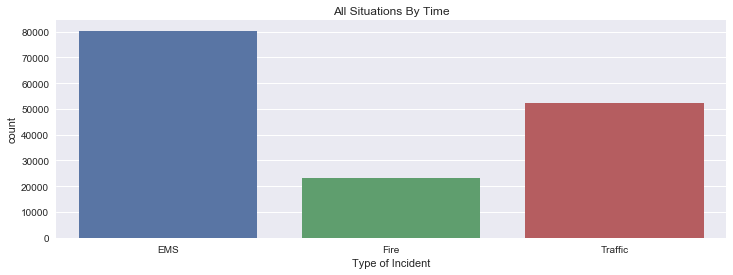

In [24]:
call_type = np.array(["Ems", "Fire", "Traffic"])
sns.plt.figure(figsize=(12,4))
sns.plt.xlabel("Type of Incident")
sns.plt.title("All Situations By Time")
sns.countplot(typeOfCall)

In [25]:
#Additional Preprocessing for Bagging and Random Forest

In [26]:
#Change string data to label encoded integers for Bagging & RandomForest Classifier
le_dow = preprocessing.LabelEncoder()
le_tod = preprocessing.LabelEncoder()
le_addr = preprocessing.LabelEncoder()
le_twp = preprocessing.LabelEncoder()
le_class = preprocessing.LabelEncoder()

le_dow = le_dow.fit_transform(df['weekday'])
le_tod = le_tod.fit_transform(df['time_of_day'])
le_addr = le_addr.fit_transform(df['addr'])
le_twp = le_twp.fit_transform(df['twp'])
le_class = le_class.fit_transform(df['class'])

In [27]:
#Create copy of dataframe
df2 = df.copy()

#Delete old columns with string values and replace with new label encoded columns
del df2['weekday']
del df2['time_of_day']
del df2['addr']
del df2['twp']
del df2['class']


df2['weekday'] = le_dow
df2['time_of_day'] = le_tod
df2['addr'] = le_addr
df2['twp'] = le_twp
df2['class'] = le_class

df2.head(10)

,lat,lng,zip,weekday,time_of_day,addr,twp,class
0,40.297876,-75.581294,19525,4,0,18187,35,0
1,40.258061,-75.264680,19446,4,0,2398,19,0
2,40.121182,-75.351975,19401,4,0,9768,36,1
3,40.116153,-75.343513,19401,4,0,615,36,0
5,40.253473,-75.283245,19446,4,0,3245,22,0
6,40.182111,-75.127795,19044,4,0,12164,20,0
7,40.217286,-75.405182,19426,4,0,4540,48,0
8,40.289027,-75.399590,19438,4,0,13272,31,0
9,40.102398,-75.291458,19462,4,0,2201,41,2
11,40.084161,-75.308386,19428,4,0,2606,41,2


In [32]:
#split dataset for building Bagging classifier
x = df2[['lat', 'lng', 'zip', 'twp', 'addr', 'time_of_day', 'weekday']].copy()
y = df2[['class']].copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [33]:
x.head()

,lat,lng,zip,twp,addr,time_of_day,weekday
0,40.297876,-75.581294,19525,35,18187,0,4
1,40.258061,-75.264680,19446,19,2398,0,4
2,40.121182,-75.351975,19401,36,9768,0,4
3,40.116153,-75.343513,19401,36,615,0,4
5,40.253473,-75.283245,19446,22,3245,0,4


In [35]:
y.head()

,class
0,0
1,0
2,1
3,0
5,0


In [36]:
bag = BaggingClassifier(base_estimator=None, max_features=7, n_estimators=100, n_jobs=-1, random_state=0)
bag.fit(x_train, y_train.values.ravel())

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=7, max_samples=1.0,
         n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
         verbose=0, warm_start=False)

In [37]:
print("Accuracy on training set: {:.3f}".format(bag.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(bag.score(x_test, y_test)))

Accuracy on training set: 0.876
Accuracy on test set: 0.654


In [38]:
bag1 = BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=7, n_estimators=100, n_jobs=-1, random_state=0)
bag1.fit(x_train, y_train.values.ravel())

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=7,
         max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [39]:
print("Accuracy on training set: {:.3f}".format(bag1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(bag1.score(x_test, y_test)))

Accuracy on training set: 0.762
Accuracy on test set: 0.664


In [40]:
#Random Forest Classification

In [41]:
#Manual 80/20 Train/Test split since data is timeseries data (newer data should be test data)
x_train2 = x[:124766]
x_test2 = x[124766:]

y_train2 = y[:124766]
y_test2 = y[124766:]

forest2 = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features=5, max_depth=25, 
                                 min_impurity_split=1e-7, n_jobs=-1, random_state=0)

forest2.fit(x_train2, y_train2.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=25, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [42]:
print("Accuracy on training set: {:.3f}".format(forest2.score(x_train2, y_train2)))
print("Accuracy on test set: {:.3f}".format(forest2.score(x_test2, y_test2)))

Accuracy on training set: 0.864
Accuracy on test set: 0.673


In [43]:
important = forest2.feature_importances_
print ('Feature importance:\n')

#Print importance value for each feature
for i in range(7):
    print(df2.columns.values[i],': ',important[i], '\n')
    

Feature importance:

lat :  0.210256521114 

lng :  0.21477153848 

zip :  0.033839872618 

weekday :  0.0367685132669 

time_of_day :  0.294231856552 

addr :  0.0197897837548 

twp :  0.190341914214 



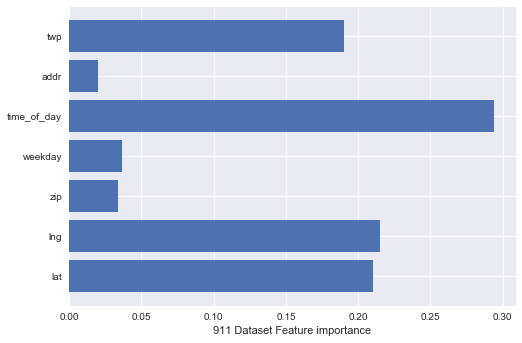

In [44]:
n_features = 7
names = []

for i in range(n_features):
    names.append(df2.columns.values[i])

#Plot importance of attributes for Random Forest Classifier
plt.barh(range(n_features), forest2.feature_importances_, align='center')
plt.yticks(np.arange(n_features), names)
plt.xlabel("911 Dataset Feature importance")

In [45]:
#SVM

In [78]:
#make a copy of data set to start transforming attributes into float 
df3= df.copy()

df3.head()

#uncomment the next two lines to encode the addresses for input in classification
le_addr = preprocessing.LabelEncoder()
le_addr = le_addr.fit_transform(df3['addr'])


#delete addrs attribute
#del df3['addr']

#uncomment next line and comment out previous line if keeping addresses is desired
df3['addr'] = le_addr


In [79]:
comb = [df3]

In [80]:
for dataset in comb:
    dataset['time_of_day'] = dataset['time_of_day'].map( {'day': 1,'night': 2} ).astype(float)

In [81]:
for dataset in comb:
    dataset['class'] = dataset['class'].map( {'Traffic': 10,'EMS': 20, 'Fire': 30} ).astype(float)

In [82]:
for dataset in comb:
     dataset['weekday'] = dataset['weekday'].map( {'Monday': 11,'Tuesday': 22,'Wednesday': 33,'Thursday': 44,'Friday': 55,'Saturday': 66, 'Sunday': 77} ).astype(float) 

In [83]:
for dataset in comb:
    dataset['twp'] = dataset['twp'].map({'NEW HANOVER' :101, 'HATFIELD TOWNSHIP': 111, 'NORRISTOWN': 12, 'LANSDALE': 13,
       'HORSHAM': 14, 'SKIPPACK': 15, 'LOWER SALFORD': 16, 'PLYMOUTH': 17,
       'UPPER MORELAND': 18, 'CHELTENHAM': 19, 'MONTGOMERY': 202, 'WHITEMARSH': 21,
       'UPPER GWYNEDD': 222, 'LOWER PROVIDENCE': 23, 'WHITPAIN': 24, 'DELAWARE COUNTY': 25,
       'FRANCONIA': 76, 'WEST CONSHOHOCKEN': 777, 'UPPER MERION': 78, 'LIMERICK': 79,
       'DOUGLASS': 26, 'LOWER MERION': 27, 'POTTSTOWN': 28, 'BRIDGEPORT': 29, 'TOWAMENCIN': 303,
       'AMBLER': 31, 'LOWER POTTSGROVE': 32, 'CHESTER COUNTY': 333, 'UPPER HANOVER': 34,
       'SPRINGFIELD': 35, 'ROCKLEDGE': 36, 'ABINGTON': 37, 'WEST NORRITON': 38,
       'ROYERSFORD': 39, 'UPPER DUBLIN': 40, 'UPPER SALFORD': 41, 'CONSHOHOCKEN': 42,
       'PENNSBURG': 43, 'TELFORD': 444, 'EAST NORRITON': 45, 'UPPER FREDERICK': 46,
       'UPPER PROVIDENCE': 47, 'SALFORD': 48, 'LEHIGH COUNTY': 49, 'MARLBOROUGH': 50,
       'BRYN ATHYN': 51, 'LOWER MORELAND': 52, 'HATBORO': 53, 'LOWER GWYNEDD': 54,
       'WORCESTER': 555, 'COLLEGEVILLE': 56, 'SCHWENKSVILLE': 57, 'SOUDERTON': 58,
       'PERKIOMEN': 59, 'LOWER FREDERICK': 60, 'BUCKS COUNTY': 61, 'RED HILL': 62,
       'WEST POTTSGROVE': 63, 'UPPER POTTSGROVE': 64, 'EAST GREENVILLE': 65,
       'NORTH WALES': 666,'JENKINTOWN': 67,'TRAPPE': 68, 'NARBERTH': 69, 'BERKS COUNTY': 70,
       'GREEN LANE': 71, 'WARRINGTON': 72, 'PHILA COUNTY': 73, 'HATFIELD': 74,
       'HATFIELD BORO': 75}).astype(float)

In [84]:
df3.head(5)

,lat,lng,zip,twp,addr,time_of_day,weekday,class
0,40.297876,-75.581294,19525,101.0,18187,1.0,44.0,20.0
1,40.258061,-75.264680,19446,111.0,2398,1.0,44.0,20.0
2,40.121182,-75.351975,19401,12.0,9768,1.0,44.0,30.0
3,40.116153,-75.343513,19401,12.0,615,1.0,44.0,20.0
5,40.253473,-75.283245,19446,13.0,3245,1.0,44.0,20.0


In [97]:
#Splitting data into training and testing sets
#uncoment this next line and comment out the following line to keep address feature
x3 = df3[['lat', 'lng', 'zip', 'addr', 'twp', 'time_of_day', 'weekday']].copy()

#x3 = df3[['lat', 'lng', 'zip', 'twp', 'time_of_day', 'weekday']].copy()
y3 = df3[['class']].copy()

In [98]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, stratify=y, random_state=42)

In [100]:
#Create Linear SVC model
model = OneVsRestClassifier(LinearSVC(random_state=0))

model.fit(x_train3,y_train3).predict(x_train3)

array([ 10.,  10.,  10., ...,  10.,  10.,  10.])

In [101]:
print("Accuracy on training set: {:.3f}".format(model.score(x_train3, y_train3)))
print("Accuracy on test set: {:.3f}".format(model.score(x_test3, y_test3)))

Accuracy on training set: 0.336
Accuracy on test set: 0.336


In [66]:
#uncomment next two blocks of code to use kernel SVM, runtime is approximately 1-1.5 hours
#from sklearn import svm

#clf = svm.SVC()
#clf.fit(x_train3,y_train3.values.ravel())

In [67]:
#print("Accuracy on training set: {:.3f}".format(clf.score(x_train3, y_train3)))
#print("Accuracy on test set: {:.3f}".format(clf.score(x_test3, y_test3)))

In [68]:
#Arrays for all latitudes and longitudes 
lats = []
longs = []

#Arrays for latitude and longitude of each different 911 call type
ems_lat = []
ems_long = []
fire_lat = []
fire_long = []
traffic_lat = []
traffic_long = []


#Put latitute and longitude of 911 calls into arrays for maps
for i in range(155957):
    lats.append(df2.iloc[i, 0])
    longs.append(df2.iloc[i, 1])
    
    #911 call for EMS
    if df2.iloc[i, 7] == 0:
        ems_lat.append(df2.iloc[i, 0])
        ems_long.append(df2.iloc[i, 1])
    
    #911 call for Fire
    elif df2.iloc[i, 7] == 1:
        fire_lat.append(df2.iloc[i, 0])
        fire_long.append(df2.iloc[i, 1])
    
    #911 call for Traffic
    else:
        traffic_lat.append(df2.iloc[i, 0])
        traffic_long.append(df2.iloc[i, 1])

In [69]:
#Latitudes and Longitudes for plotting boundaries of Montgomery County Pennsylvania
lat_bound = (40.241979, 40.447123, 40.138185, 40.069056, 40.063658, 40.046278, 40.084713, 
40.073154, 40.092990, 40.054093, 40.011573, 39.977010, 40.019547, 40.015951, 40.072212, 
40.060884, 40.097123, 40.090095, 40.094000, 40.087753, 40.115236, 40.126164, 40.129910,
40.147977, 40.194150, 40.223927, 40.236395, 40.241979)

long_bound = (-75.696874, -75.529820, -75.015042, -75.096642, -75.087832, -75.110155,
-75.176633, -75.188473, -75.223789, -75.264413, -75.206578, -75.276598, -75.311506, 
-75.320488, -75.367236, -75.392806, -75.420365, -75.437921, -75.440779, -75.456498, 
-75.471208, -75.463654, -75.500604, -75.524058, -75.569582, -75.608164, -75.687167, -75.696874)                    


#Create map centered at lat, long, amount of zoom
gmap = gmplot.GoogleMapPlotter(40.194126, -75.362524, 8.5)

#Plot outline of Montgomery County
gmap.plot(lat_bound, long_bound, 'cornflowerblue', edge_width=5)

#Plot 911 call location in heatmap form
gmap.heatmap(lats, longs)

#Save html file of Google map
gmap.draw("Montgomery_County_Heatmap.html")

In [70]:
#Create map centered at lat, long, amount of zoom
gmap2 = gmplot.GoogleMapPlotter(40.194126, -75.362524, 10)

#Plot outline of Montgomery County
gmap2.plot(lat_bound, long_bound, 'cornflowerblue', edge_width=5)

#Plot first 10,000 EMS, Fire, and Traffic 911 call locations onto map (30,000 call locations total)
#EMS = green
gmap2.scatter(ems_lat[0:10000],ems_long[0:10000] , 'g', 5, marker=False)
#Fire = red
gmap2.scatter(fire_lat[0:10000],fire_long[0:10000] , 'r', 5, marker=False)
#Traffic = yellow
gmap2.scatter(traffic_lat[0:10000],traffic_long[0:10000] , 'y', 5, marker=False)


#Save html file of Google map
gmap2.draw("911_Call_Locations.html")